In [222]:
pwd()

"/home/xlx0727/Scripts/Statistic/qgplsim"

# Start

In [6]:
# run this ceil if source codes was edited
include("DGP.ji")
# include("qgplsim.ji")
include("MonteCarloSIM.ji")
using Statistics, LinearAlgebra, Clustering
using LaTeXStrings, Plots

import Base.Threads.@threads

┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1317


# QGPLSIM fitting

In [369]:
# run this ceil for different data sets

α = [1.0, -0.5] # single index for x
θ = [1.0, 2.0] # linear for x, <α, θ> = 0 for identification
γ = [0.001, 0.5] # single index for z
β = [0.5, -1.0] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
fx = 2 # y = f(x), fx for different f(x)     
                # fx = 1, y = X*θ + Z*β + (X*α + Z*γ .- 1).^2 + 0.2ϵ
                # fx = 2, y = X*θ + Z*β + log.(1 .+ exp.(X*α + Z*γ .- 1)) + 0.2ϵ

ifz = true # if false, Z = 0, i.e. no category varible
dist = 1 # 0 for gauss, 1 for Cauchy
X, Z, y = dgp(n, γ, θ, α, β, fx, dist,  ifz)
# p = length(α)
# q = length(γ)
τ = 0.5

# Estimation 

model1 = qgplsim.model(X, Z, y, τ)
alpha_type = 1
# different weight of sum on alpha 
# 0 for true alpha, using α in DGP
# 1 for global: ∑ij sum(Bi - Bj) / n;
# 2 for local: ∑z ∑ij (bzi - bzj) * nz / n;
# when Z = 0, global == local
@time alpha, theta, gamma, beta = qgplsim.estimator(model1, alpha_type)
coefa = 1 #/ alpha[1]
coefg = 1 #/ gamma[1]
println("Estimation of index coefs: ")
println("̂α => ", coefa * alpha)
println("̂γ => ", gamma)

println("Estimation of linear coefs: ")
println("̂θ => ", theta)
println("̂β => ", beta)

# theta * alpha

  3.948757 seconds (3.49 M allocations: 11.253 GiB, 45.65% gc time)
Estimation of index coefs: 
̂α => [0.9757715583372923, -0.21879183243442163]
̂γ => [0.0013597083505795474, 0.8082338747679054]
Estimation of linear coefs: 
̂θ => [0.4504721150487661 2.0090232473389014]
̂β => [0.13270697511747076, -1.6462816275243621]


In [368]:
70^(-0.2)

0.4275435825099656

# Paths of $g(x \alpha + z \gamma)$ and $\nabla g$

$\alpha = \hat{\alpha}$,
$z \in S_z$

In [1]:
using Plots
# include("qgplsim.ji")

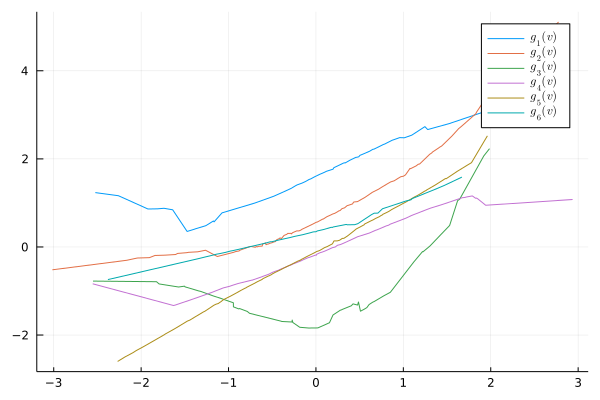

In [297]:

v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
categ, index = model1.categ, model1.index
g, dg = qgplsim.Gz_DGz(v, Z, y, -0.15) # g: g(v), dg: g'(v)
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

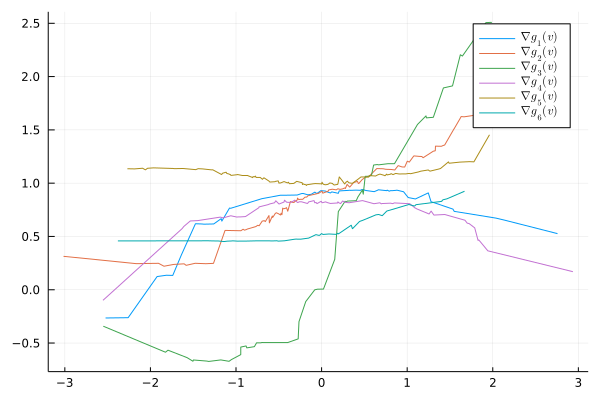

In [298]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end
fig

# Monte Carlo Simulation

In [341]:
Threads.nthreads()

6

In [2]:
include("MonteCarloSIM.ji")

simulation (generic function with 2 methods)

In [3]:
α = [1.0, 0.5] # single index for x
θ = [1.0, -2.0]  # linear for x, <α, θ> = 0 for identification
γ = [1.001, 0.5] # single index for z
β = [1.0, -0.5] # linear for z
# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)
n = 250
fx = 2
dist = 1 # Cauchy
len = 200
alpha_type = 1

1

In [4]:
res, Alpha, Gamma = MonteCarlo(n, γ, θ, α, β, fx, dist, len, alpha_type)


0.0%┣                                             ┫ 0/200 [00:00<00:-10, -0s/it]
0.5%┣▏                                         ┫ 1/200 [00:08<Inf:Inf, InfGs/it]
1.0%┣▌                                              ┫ 2/200 [00:09<28:26, 9s/it]
1.5%┣▊                                              ┫ 3/200 [00:09<15:00, 5s/it]
2.0%┣█                                              ┫ 4/200 [00:10<10:33, 3s/it]
2.5%┣█▏                                             ┫ 5/200 [00:10<08:20, 3s/it]
3.0%┣█▍                                             ┫ 6/200 [00:11<06:58, 2s/it]
3.5%┣█▋                                             ┫ 7/200 [00:11<06:03, 2s/it]
4.0%┣█▉                                             ┫ 8/200 [00:12<05:24, 2s/it]
4.5%┣██▏                                            ┫ 9/200 [00:12<04:55, 2s/it]
5.0%┣██▎                                           ┫ 10/200 [00:13<04:32, 1s/it]
5.5%┣██▌                                           ┫ 11/200 [00:13<04:14, 1s/it]
6.0%┣██▊                    

(Dict(:α2 => 0.023524879355417534, :β1 => 0.9696930275510354, :var_γ1 => 1.4113853670387975, :var_β2 => 0.47867806330654267, :α1 => -0.0804871397871061, :θ2 => -1.4022628946310547, :γ1 => 0.008145061226836949, :var_θ1 => 0.5643224215657588, :var_α2 => 0.332492435158122, :var_α1 => 0.6654657561787665…), [-0.967051588686982 -0.25458048789721516; 0.9100678202188943 0.41445936182215776; … ; -0.9534826874560602 -0.3014477810858277; -0.9989453880882699 0.04591417664703966], [-1.3293919134777836 -0.6046178726002595; 1.0176436814059715 0.2723894348795114; … ; -1.1246659209866372 -0.8744488181787328; -1.4385810920861133 -0.4545598085222038])

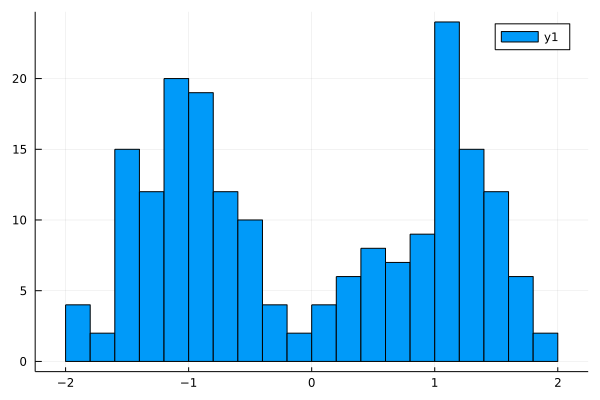

In [5]:
histogram(Gamma[:,1], bins = -2:0.2:2)

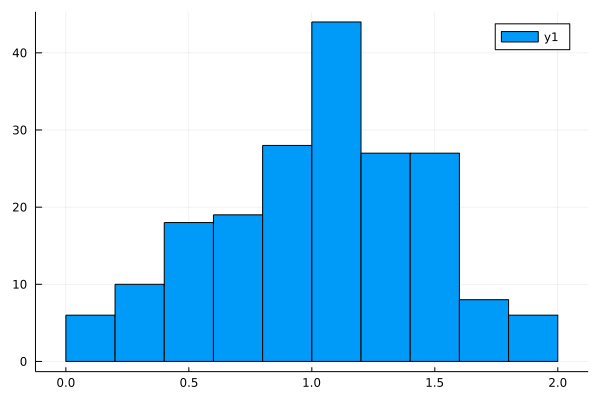

In [14]:
histogram(abs.(Gamma[:,1]), bins = 0:0.2:2)

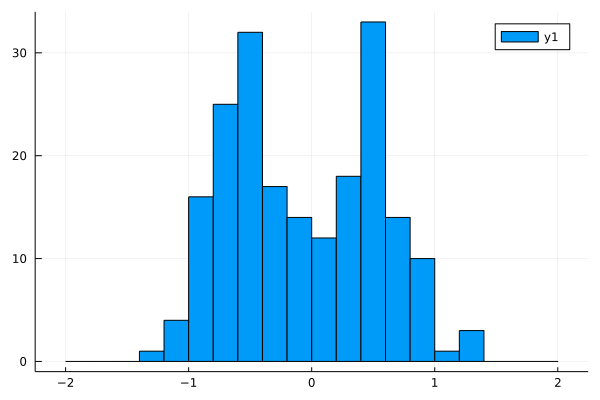

In [7]:
histogram(Gamma[:,2], bins = -2:0.2:2)

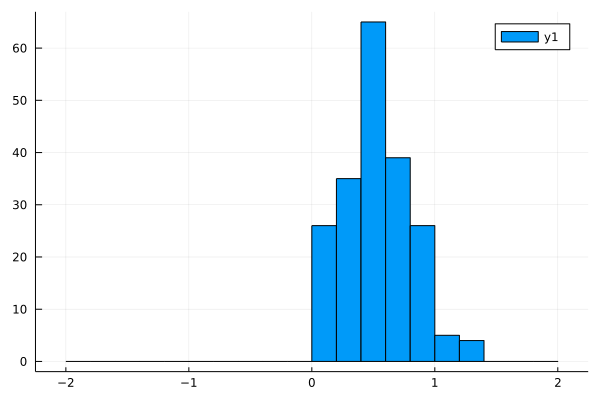

In [22]:
histogram(abs.(Gamma[:,2]), bins = -2:0.2:2)

In [8]:
Rg = kmeans(transpose(Gamma), 2)
Rg.centers

2×2 Matrix{Float64}:
 -1.02939   1.13214
 -0.552588  0.450225

In [24]:
absRg = kmeans(transpose(abs.(Gamma)), 1)
absRg.centers

2×1 Matrix{Float64}:
 1.0810994904674376
 0.5281596729630472

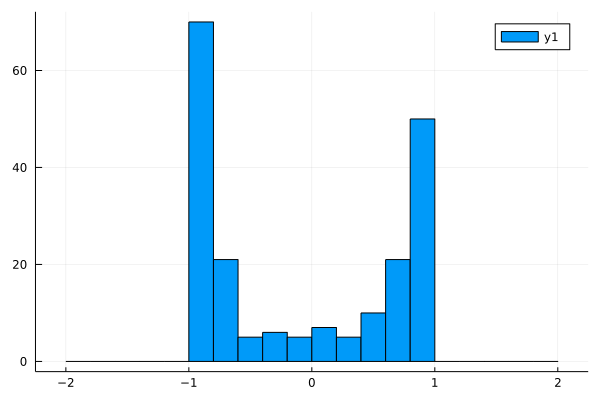

In [11]:
histogram(Alpha[:,1], bins = -2:0.2:2)

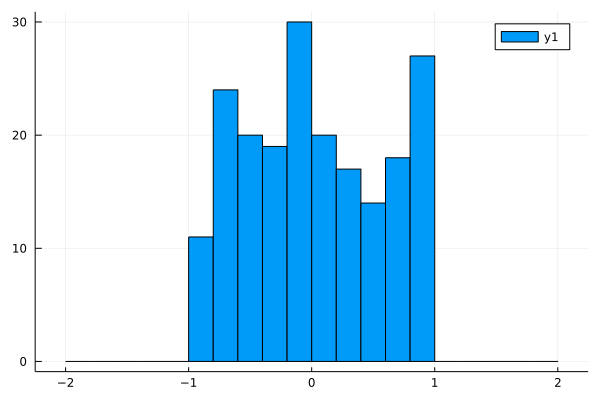

In [12]:
histogram(Alpha[:,2], bins = -2:0.2:2)

In [9]:
Ra= kmeans(transpose(Alpha), 2)
Ra.centers

2×2 Matrix{Float64}:
 0.721853  -0.791996
 0.352137  -0.267886

In [25]:
absRa= kmeans(transpose(abs.(Alpha)), 1)
absRa.centers

2×1 Matrix{Float64}:
 0.775177085219766
 0.48475145602931685

In [10]:
alpha = sum(abs.(Ra.centers), dims = 2)
alpha ./ alpha[1]

2×1 Matrix{Float64}:
 1.0
 0.4095674414694948

In [351]:
using DataFrames
df = DataFrame(α1 = Float64[], α2 = Float64[],
               var_α1 = Float64[], var_α2 = Float64[],    
               θ1 = Float64[], θ2 = Float64[],
               var_θ1 = Float64[], var_θ2 = Float64[], 
               β1 = Float64[], β2 = Float64[],
               var_β1 = Float64[], var_β2 = Float64[], 
               γ1 = Float64[], γ2 = Float64[],
               var_γ1 = Float64[], var_γ2 = Float64[])


,α1,α2,var_α1,var_α2,θ1,θ2,var_θ1,var_θ2,β1
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64


In [340]:
A = [:α1, :α2, :var_α1, :var_α2]
T = [:θ1, :θ2, :var_θ1, :var_θ2]
G = [:γ1, :γ2, :var_γ1, :var_γ2]
B = [:β1, :β2, :var_β1, :var_β2]

4-element Vector{Symbol}:
 :β1
 :β2
 :var_β1
 :var_β2

In [ ]:
@threads for γ in [[1.0, 0.5], [1.0, 0.001], [0.001, 1.0], [0.5, 1.0],[0.5, 0.5], [0.0001, 0.0001]]
    res, =  MonteCarlo(n, γ, θ, α, β, fx, dist, len, alpha_type)
    push!(df, res)
end